KeyboardInterrupt: 

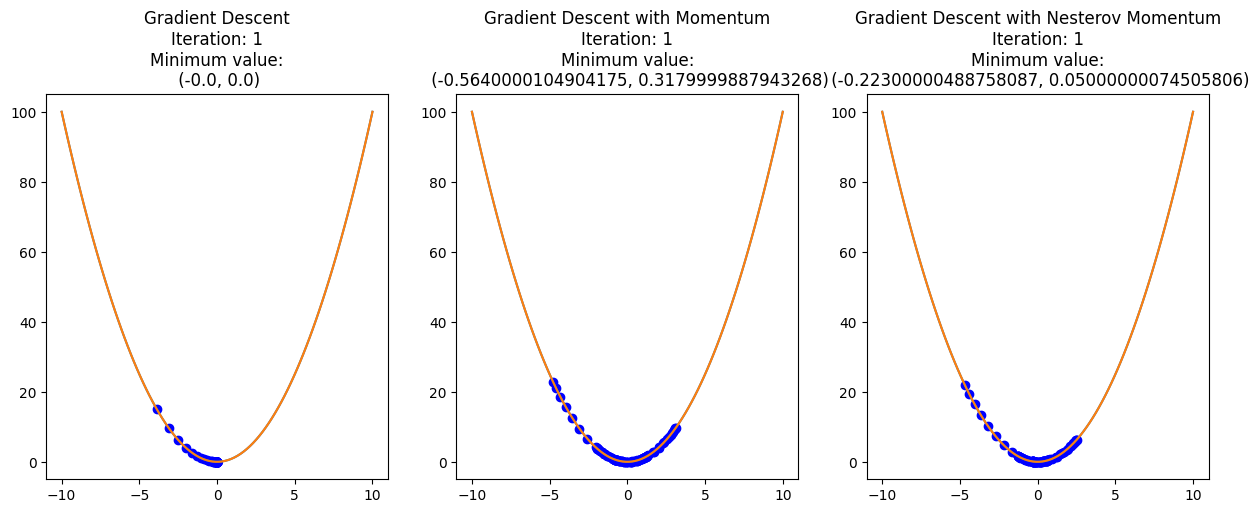

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the function and its derivative
def f(x):
    return x ** 2
optimizers = [
    tf.keras.optimizers.SGD(learning_rate=0.1),
    tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.96),
    tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.96, nesterov=True),
]
 
optimizer_names = ["Gradient Descent", "Gradient Descent with Momentum", "Gradient Descent with Nesterov Momentum"]
# Set up the plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
x_vals = np.linspace(-10, 10, 100)
y_vals = f(x_vals)

# Initialize variables for each optimizer
tfx_list = [tf.Variable(-4.87) for _ in range(len(optimizers))]
opt_list = optimizers
visited_points = [[] for _ in range(len(optimizers))]

# Animation function
def update(frame, lines, scatters, titles):
    for i, opt in enumerate(opt_list):
        val = opt.minimize(lambda: f(tfx_list[i]), var_list=[tfx_list[i]])
        visited_points[i].append((tfx_list[i].numpy(), f(tfx_list[i]).numpy()))
        lines[i].set_data(x_vals, f(x_vals))
        scatters[i].set_offsets(visited_points[i])
        titles[i].set_text(f"{optimizer_names[i]}\nIteration: {frame+1}\nMinimum value:\n ({np.round(tfx_list[i].numpy(), 3)}, {np.round(f(tfx_list[i]).numpy(), 3)})")

# Set up the plots for each optimizer
lines_list = [ax.plot([], [])[0] for ax in axs]
scatters_list = [ax.scatter([], [], color='blue') for ax in axs]
titles_list = [ax.set_title("SGD") for ax in axs]

for ax in axs:
    ax.plot(x_vals, y_vals)

# Set up the animation
ani = FuncAnimation(fig, update, frames=100, fargs=(lines_list, scatters_list, titles_list), interval=100, repeat=False)

# Display the animation
from IPython.display import HTML
HTML(ani.to_jshtml())